In [390]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sklearn

pd.set_option('float_format', '{:f}'.format)

df = pd.read_csv('Tetuan City power consumption.csv', sep=",", header=0)

display(df.head(10))

# rename DateTime column to date
df = df.rename(columns={'DateTime': 'date'})


# Date Time: Each ten minutes.
# Temperature: Weather Temperature of Tetouan city.
# Humidity: Weather Humidity of Tetouan city.
# Wind Speed of Tetouan city.
# general diffuse flows
# diffuse flows
# power consumption of zone 1 of Tetouan city.
# power consumption of zone 2 of Tetouan city.
# power consumption of zone 3 of Tetouan city. 


,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559000,73.800000,0.083000,0.051000,0.119000,34055.696200,16128.875380,20240.963860
1,1/1/2017 0:10,6.414000,74.500000,0.083000,0.070000,0.085000,29814.683540,19375.075990,20131.084340
2,1/1/2017 0:20,6.313000,74.500000,0.080000,0.062000,0.100000,29128.101270,19006.686930,19668.433730
3,1/1/2017 0:30,6.121000,75.000000,0.083000,0.091000,0.096000,28228.860760,18361.094220,18899.277110
4,1/1/2017 0:40,5.921000,75.700000,0.081000,0.048000,0.085000,27335.696200,17872.340430,18442.409640
5,1/1/2017 0:50,5.853000,76.900000,0.081000,0.059000,0.108000,26624.810130,17416.413370,18130.120480
6,1/1/2017 1:00,5.641000,77.700000,0.080000,0.048000,0.096000,25998.987340,16993.313070,17945.060240
7,1/1/2017 1:10,5.496000,78.200000,0.085000,0.055000,0.093000,25446.075950,16661.398180,17459.277110
8,1/1/2017 1:20,5.678000,78.100000,0.081000,0.066000,0.141000,24777.721520,16227.355620,17025.542170
9,1/1/2017 1:30,5.491000,77.300000,0.082000,0.062000,0.111000,24279.493670,15939.209730,16794.216870


### Vamos tentar prever a quantidade de consumo de energia na cidade de Tetuan

primeiramente tratando os dados

In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      52416 non-null  object 
 1   Temperature               52416 non-null  float64
 2   Humidity                  52416 non-null  float64
 3   Wind Speed                52416 non-null  float64
 4   general diffuse flows     52416 non-null  float64
 5   diffuse flows             52416 non-null  float64
 6   Zone 1 Power Consumption  52416 non-null  float64
 7   Zone 2 Power Consumption  52416 non-null  float64
 8   Zone 3 Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


podemos observar que nao existem dados nao nulos/dados faltando

In [392]:
display(df.describe())

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


Colocando a coluna Date como data

In [393]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y %H:%M')

print(df['date'])

0       2017-01-01 00:00:00
1       2017-01-01 00:10:00
2       2017-01-01 00:20:00
3       2017-01-01 00:30:00
4       2017-01-01 00:40:00
                ...        
52411   2017-12-30 23:10:00
52412   2017-12-30 23:20:00
52413   2017-12-30 23:30:00
52414   2017-12-30 23:40:00
52415   2017-12-30 23:50:00
Name: date, Length: 52416, dtype: datetime64[ns]


##### de uma forma geral podemos ver que os dados não apresentam valores estranhos, não existem valores zerados/negativos


#### Juntando os dados de consumo de energia de cada zona em uma única coluna

In [394]:
df['mean_power_consumption'] = df[['Zone 1 Power Consumption', 'Zone 2 Power Consumption', 'Zone 3 Power Consumption']].mean(axis=1)

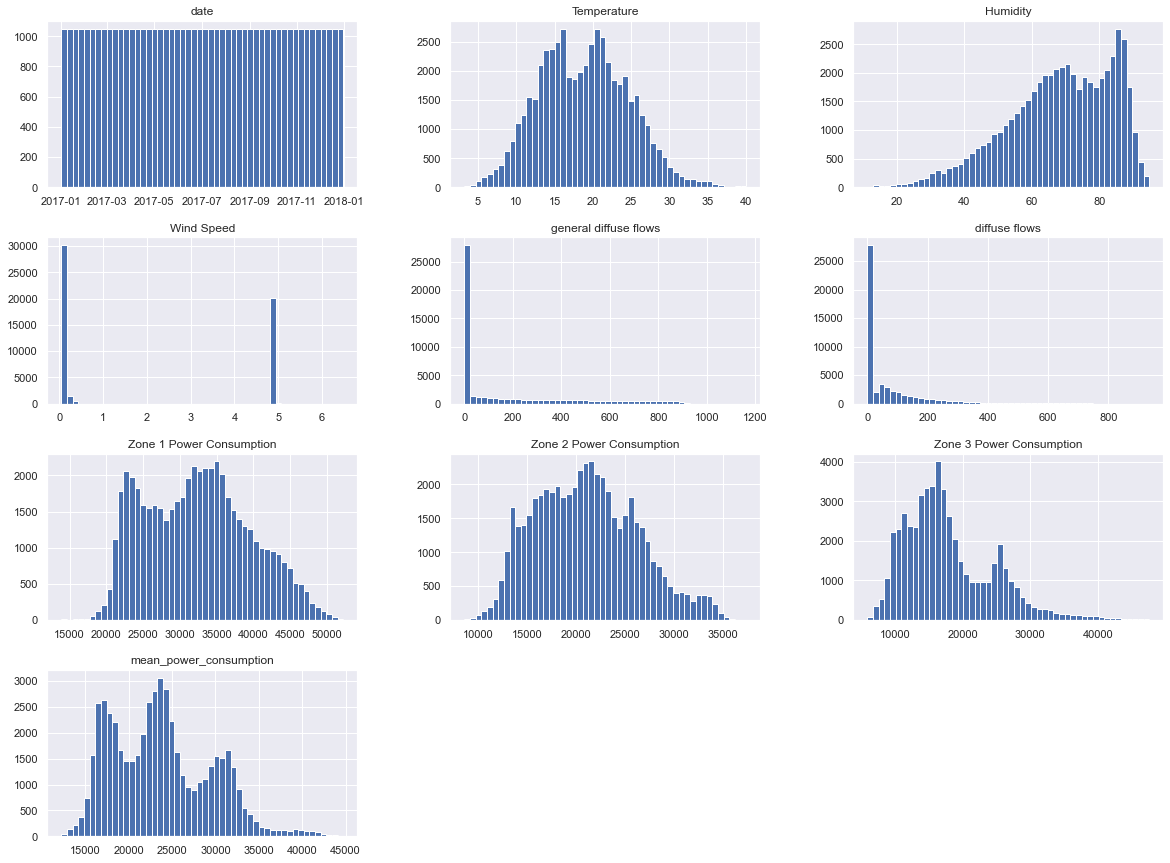

In [395]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

regiao que mais consome?

##### BoxPlots

<AxesSubplot:>

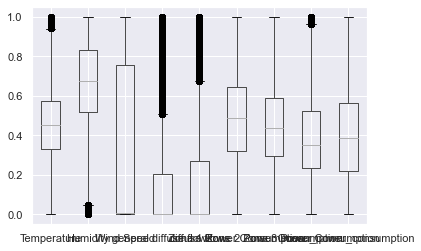

In [396]:
from pydoc import describe
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from numpy import percentile

df_data = df[['date', 'mean_power_consumption']]

df = df.drop(['date'], axis=1)


# removendo outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

scaled_df.boxplot(
    column=['Temperature','Humidity','Wind Speed','general diffuse flows','diffuse flows','Zone 1 Power Consumption','Zone 2 Power Consumption','Zone 3 Power Consumption', 'mean_power_consumption'])


Matriz de correlação

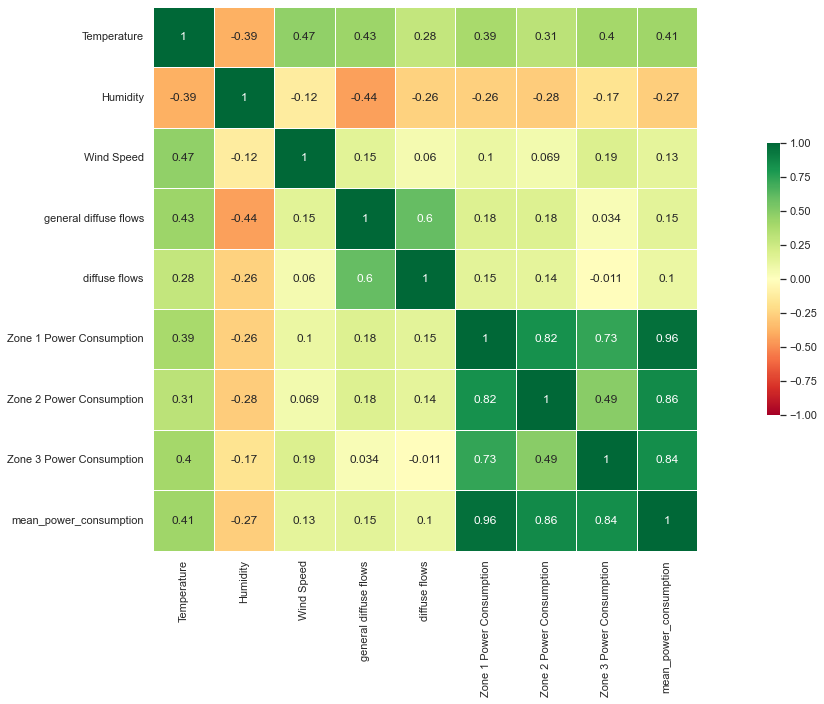

In [397]:
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(25, 10))
corr = df.corr()

sns.heatmap(corr, annot=True, cmap='RdYlGn', vmax=1,
        vmin=-1, center=0, square=True,
        linewidth=.5, cbar_kws={"shrink":.5})

plt.show()

Aqui podemos observar alguns fatores que fazem sentido, como a alta correlação entre o consumo nas zonas, assim como general diffuse flows e diffuse flows

#### Regressao Linear

In [398]:
powerC = {}

powerC["features"] = scaled_df[['Temperature','Humidity','Wind Speed','general diffuse flows','diffuse flows']]
powerC["target"] = scaled_df['mean_power_consumption']

Mean squared error: 0.032670
Mean absolute error: 0.149636
Root Mean squared error: 0.180749
R2 score: 0.187090
Coefficients: 
 [ 0.51439948 -0.14398203 -0.04160297 -0.07378839  0.00765273]
Intercept: 
 0.28335443212602746
Score: 
 0.18708994184798888
scores: 
 [-0.03196953 -0.03120711 -0.03206473 -0.03237928 -0.03445661 -0.03289589
 -0.03372438]
scores mean:  -0.03267107666333901
scores std:  0.001030689446809731


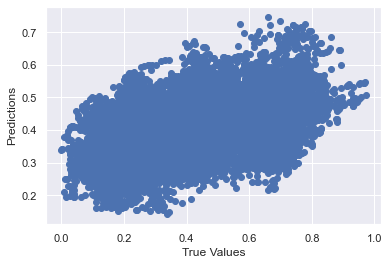

In [399]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

x_train, x_test, y_train, y_test = train_test_split(powerC['features'], powerC['target'], test_size=0.3)

# train the model
model = LinearRegression()
model.fit(x_train, y_train)

# make predictions
y_pred = model.predict(x_test)

# evaluate the model
print('Mean squared error: %f' % mean_squared_error(y_test, y_pred)) # dif entre valor predito e valor real elevar ao quadrado, soma todos os erros e divide pelo numero de amotras
print('Mean absolute error: %f' % mean_absolute_error(y_test, y_pred)) # quanto que em media o modelo esta errando o valor do total de sales
print('Root Mean squared error: %f' %(np.sqrt(mean_squared_error(y_test, y_pred))))
print('R2 score: %f' % r2_score(y_test, y_pred))


print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)
print('Score: \n', model.score(x_test, y_test))

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x_test, y_test, cv=7, scoring='neg_mean_squared_error')
print('scores: \n', scores)

print('scores mean: ', scores.mean())
print('scores std: ', scores.std())

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

#### Utilizando outros modelos 

In [400]:
def norma_l2(X):
    X = X.astype(float)
    X = X - np.mean(X, axis=0)
    X = X / np.linalg.norm(X, axis=0)
    return X

#### Lasso Regression

In [401]:
from sklearn.linear_model import Lasso

ls = Lasso(alpha=0.01)
ls_scores = cross_val_score(ls, norma_l2(powerC["features"]), powerC["target"], cv=7, error_score="raise")

print('ls score: ', ls_scores.mean())


ls score:  -0.12680345524759296


#### Ridge Regression

In [402]:
from sklearn.linear_model import Ridge


rg = Ridge(alpha=0.05)
lr = LinearRegression()

lr_scores = cross_val_score(lr, norma_l2(powerC["features"]), powerC["target"], cv=7)
print(lr_scores)
print('lr mean scores: ', lr_scores.mean())

rg_scores = cross_val_score(rg, norma_l2(powerC["features"]), powerC["target"], cv=7)
print('rg mean scores: ', rg_scores.mean())

from sklearn.linear_model import RidgeCV

rg = RidgeCV(alphas=(1.0, 0.1, 0.01, 0.005, 0.0025, 0.001, 0.00025))
rg.fit(norma_l2(powerC["features"]), powerC["target"])

print('rg alpha: ', rg.alpha_)

[-0.04017459  0.12415904  0.16256736  0.09581635  0.09855663  0.01593574
  0.12682627]
lr mean scores:  0.0833838279237159
rg mean scores:  0.08635710291230052
rg alpha:  0.00025


#### ElasticNet Regression

In [403]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

en = ElasticNet(alpha=0.001, l1_ratio=0.8)
en_scores = cross_val_score(en, norma_l2(powerC["features"]), powerC["target"], cv=10)

print('ElasticNet mean scores: ',en_scores.mean())

encv = ElasticNetCV(alphas=(0.1, 0.01, 0.005, 0.0025, 0.001), l1_ratio=(0.1, 0.25, 0.5, 0.75, 0.8))
encv.fit(norma_l2(powerC["features"]), powerC["target"])

print(encv.alpha_)
print(encv.l1_ratio_)

ElasticNet mean scores:  -0.15077837367258098
0.001
0.1


#### Polinomiau Grau 2

score:  0.23013265651401293
Coefficients:  [ 0.         -0.62684772  0.14586166 -1.41584434 -0.25265231  0.12569696
  1.0417744   0.48949232  0.01603809 -0.3473303  -0.19070047 -0.42859958
 -0.06781781  0.0309926   0.06784138  1.80565563  0.04515644  0.07178962
  0.42722637 -0.12276754  0.00789288]
Intercept:  0.45498306429170854
Mean squared error: 0.030704
Mean absolute error: 0.142562
Root Mean squared error: 0.175227
R2 score: 0.230133


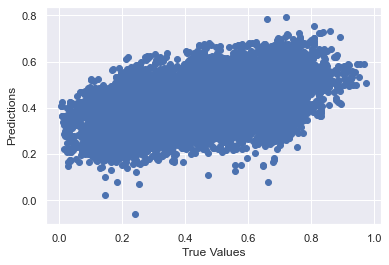

In [404]:
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import PolynomialFeatures

x_train, x_test, y_train, y_test = train_test_split(powerC['features'], powerC['target'], test_size=0.3)

poly_reg2 = PolynomialFeatures(degree=2)

x_poly = poly_reg2.fit_transform(powerC['features'])

regressor = LinearRegression()

regressor.fit(x_poly, powerC['target'])

y_pred = regressor.predict(poly_reg2.fit_transform(x_test))


print('score: ', regressor.score(poly_reg2.fit_transform(x_test), y_test))

print('Coefficients: ', regressor.coef_)
print('Intercept: ', regressor.intercept_)

print('Mean squared error: %f' % mean_squared_error(y_test, y_pred)) # dif entre valor predito e valor real elevar ao quadrado, soma todos os erros e divide pelo numero de amotras
print('Mean absolute error: %f' % mean_absolute_error(y_test, y_pred)) # quanto que em media o modelo esta errando o valor do total de sales
print('Root Mean squared error: %f' %(np.sqrt(mean_squared_error(y_test, y_pred))))
print('R2 score: %f' % r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()


#### Polinomial Grau 4

score:  0.28930529873328414
Coefficients:  [-1.07361308e-13  4.89692834e+00  6.61937104e-01  9.55297957e+00
 -5.14395487e+00  1.56428132e+00 -1.08564178e+01 -3.79571087e+00
 -1.24684868e+01  6.92806333e-01  3.95798383e+00 -2.54729403e+00
 -3.11916658e+01  6.94777038e+00  5.28718105e-01 -3.88854566e+00
 -7.28737283e+00 -3.44245359e+00  1.43460025e+01 -3.75639308e+00
 -4.60219840e+00  7.69551399e+00  3.99322952e+00  1.67987227e+01
  1.40598006e+00 -3.20049596e+00  2.49695056e+00  1.01877380e+01
 -7.98605651e+00 -4.50289247e+00  9.60631839e+00 -2.65110986e+00
  2.70837509e+00  2.26508998e+00 -2.82075937e+00  3.29528918e-01
  4.61871602e+00  1.75783730e+01 -4.28521056e+00 -4.06875621e+00
  5.33338133e+01  1.01323153e+01  6.48745888e+00 -4.21408531e+00
 -1.00502095e+00  5.80236920e+00 -2.86704863e+01  1.71990069e+01
 -1.29954131e+00  2.02351854e+00  1.54806358e+00 -5.03019472e-01
 -1.82990233e+01  4.87385845e+00  2.92784478e+00  2.77437675e+00
 -4.09240742e-01  6.04446938e-01 -6.06365710e+0

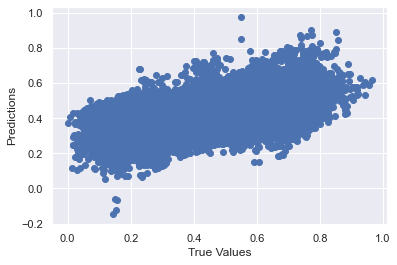

In [405]:
x_train, x_test, y_train, y_test = train_test_split(powerC['features'], powerC['target'], test_size=0.3)

poly_reg2 = PolynomialFeatures(degree=4)

x_poly = poly_reg2.fit_transform(powerC['features'])

regressor = LinearRegression()

regressor.fit(x_poly, powerC['target'])

y_pred = regressor.predict(poly_reg2.fit_transform(x_test))


print('score: ', regressor.score(poly_reg2.fit_transform(x_test), y_test))

print('Coefficients: ', regressor.coef_)
print('Intercept: ', regressor.intercept_)

print('Mean squared error: %f' % mean_squared_error(y_test, y_pred)) # dif entre valor predito e valor real elevar ao quadrado, soma todos os erros e divide pelo numero de amotras
print('Mean absolute error: %f' % mean_absolute_error(y_test, y_pred)) # quanto que em media o modelo esta errando o valor do total de sales
print('Root Mean squared error: %f' %(np.sqrt(mean_squared_error(y_test, y_pred))))
print('R2 score: %f' % r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()


#### Analise com Prophet

In [406]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

from dask.distributed import Client
from prophet.diagnostics import cross_validation

from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [407]:
power_consumption = pd.read_csv('Tetuan City power consumption.csv', sep=",", header=0, usecols=['DateTime', 'Zone 1 Power Consumption'])
power_consumption['DateTime'] = pd.to_datetime(power_consumption['DateTime'], errors='coerce')
power_consumption = power_consumption.rename(columns={'DateTime': 'date'})
### agrupando por dia
power_consumption = power_consumption.groupby(power_consumption['date'].dt.date).mean().reset_index()



power_consumption = df_data
power_consumption['date'] = pd.to_datetime(power_consumption['date'], errors='coerce')
### agrupando por dia
power_consumption = power_consumption.groupby(power_consumption['date'].dt.date).mean().reset_index()

power_consumption.columns = ['ds', 'y']
power_consumption

,ds,y
0,2017-01-01,21357.272845
1,2017-01-02,22082.660718
2,2017-01-03,22746.839991
3,2017-01-04,22821.867668
4,2017-01-05,22833.676446
...,...,...
359,2017-12-26,22055.387162
360,2017-12-27,22174.241185
361,2017-12-28,22006.427519
362,2017-12-29,21663.907423


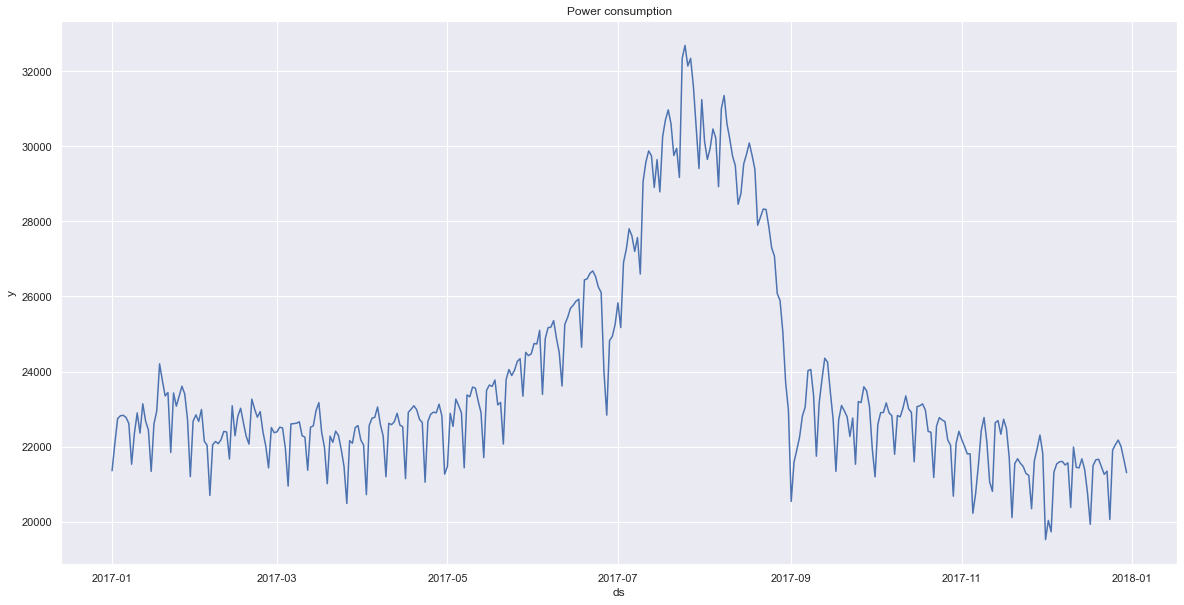

In [408]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=power_consumption, x='ds', y='y')
plt.title('Power consumption')
plt.show()

In [429]:
m = Prophet()
m.fit(power_consumption)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [430]:
future = m.make_future_dataframe(periods=30, freq="D")
future.tail()

,ds
389,2018-01-25
390,2018-01-26
391,2018-01-27
392,2018-01-28
393,2018-01-29


In [431]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
389,2018-01-25,20864.894157,19654.740995,22183.402793
390,2018-01-26,20454.960542,19211.658987,21853.195011
391,2018-01-27,20274.817203,19010.411781,21657.567849
392,2018-01-28,19180.486295,17923.144684,20492.912785
393,2018-01-29,20496.028579,19126.429193,21983.730119


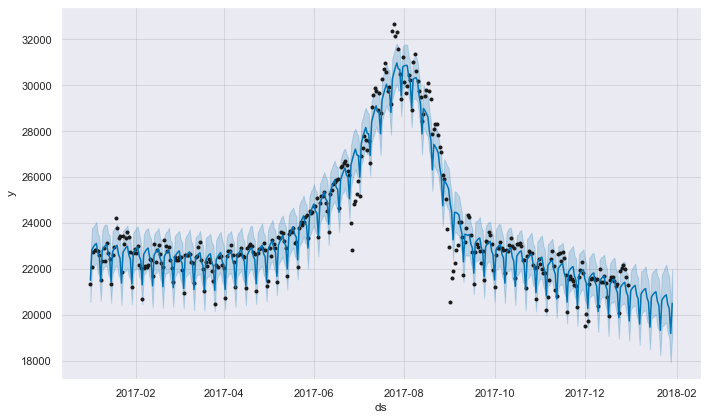

In [432]:
fig1 = m.plot(forecast)

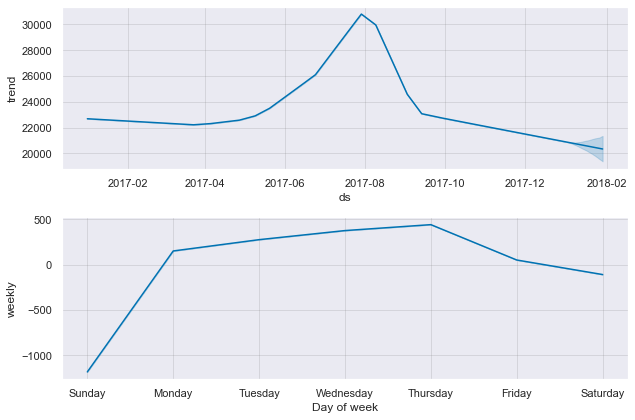

In [433]:
fig2 = m.plot_components(forecast)

#### podemos observar que a predicao não esta muito efetiva, isso ocorre devido a sazonalidade do consumo de energia, em alguns meses do ano e comum se consumir menos energia

#### Aplicando o modelo novamente com parametro de sazionalidade

In [434]:
m2 = Prophet(seasonality_mode='multiplicative')
m2.fit(power_consumption)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [435]:
future2 = m2.make_future_dataframe(periods=30, freq="D")
forecast2 = m2.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
389,2018-01-25,20834.446202,19524.427714,22092.166329
390,2018-01-26,20483.025391,19108.643397,21920.033795
391,2018-01-27,20332.409961,19099.812224,21597.771960
392,2018-01-28,19405.707934,18026.837290,20675.350609
393,2018-01-29,20521.828991,19065.507341,22060.111315


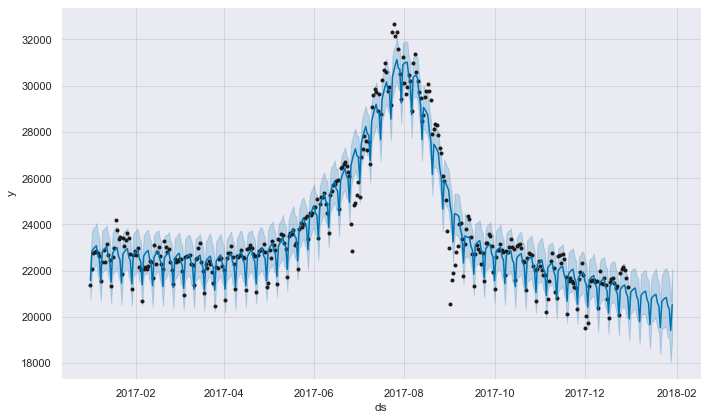

In [436]:
fig3 = m2.plot(forecast2)

#### verificando trendpoints para a adaptação correta do modelo

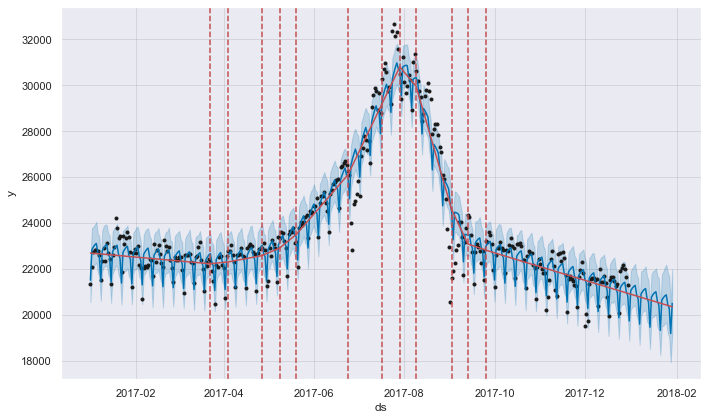

In [437]:
trend1 = m.plot(forecast)
a = add_changepoints_to_plot(trend1.gca(), m, forecast)

Crossvalidation

In [438]:
client = Client()
df_cv = cross_validation(m, horizon='30 days', parallel='dask' )

c:\Users\thiago\anaconda3\lib\site-packages\distributed\node.py:180: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 63469 instead
  warnings.warn(
INFO:prophet:Making 17 forecasts with cutoffs between 2017-04-04 00:00:00 and 2017-11-30 00:00:00
INFO:prophet:Applying in parallel with <Client: 'tcp://127.0.0.1:63470' processes=3 threads=6, memory=15.94 GiB>


In [439]:
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,3268708.421717,1807.956975,1206.037032,0.050111,0.025760,0.048782,0.431373
1,4 days,3178600.511313,1782.863010,1202.292717,0.049556,0.024899,0.048486,0.431373
2,5 days,3422890.196875,1850.105456,1219.893412,0.049916,0.023650,0.048848,0.470588
3,6 days,3510875.712651,1873.733095,1266.988024,0.051118,0.024899,0.050480,0.470588
4,7 days,3817478.142234,1953.836775,1367.639201,0.054186,0.030834,0.054059,0.450980
5,8 days,4505647.723826,2122.651107,1570.740905,0.061927,0.040081,0.061892,0.411765
6,9 days,5528480.075535,2351.272012,1811.637827,0.071979,0.065524,0.071550,0.352941
7,10 days,5978335.530913,2445.063502,1898.171345,0.075994,0.066895,0.075240,0.352941
8,11 days,6370569.188751,2523.998651,1914.576356,0.077100,0.054620,0.076173,0.333333
9,12 days,6933171.511721,2633.091626,1924.553954,0.077564,0.051534,0.076533,0.333333


### Nao tivemos um bom resultado ( Coverage Baixo )

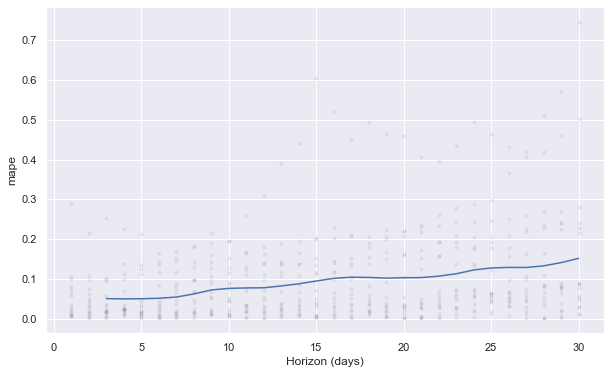

In [440]:
fig_cv = plot_cross_validation_metric(df_cv, metric='mape')